<a href="https://colab.research.google.com/github/surajsts/Neural_Network_ANN/blob/main/HandWritten_numbers_prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [47]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.mnist.load_data()

# using the  mnist data for the neural network

In [3]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [4]:
print(len(x_train))
print(len(x_test))

60000
10000


In [50]:
def image_show(x, y, index):
  plt.figure(figsize=(2,2))
  plt.imshow(x[index])
  plt.xlabel(y[index])

  # function for printing the image alongwith their labels

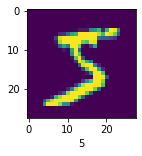

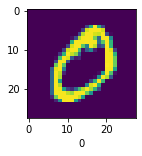

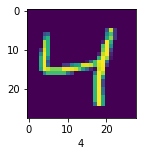

In [49]:
image_show(x_train, y_train, 0)
image_show(x_train, y_train, 1)
image_show(x_train, y_train, 2)

# images and their corresponding labels

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [51]:
x_train_new = x_train.reshape(len(x_train),784)
x_test_new = x_test.reshape(len(x_test),784)
x_train_new[:5]

# flattening the train and test arrays

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
x_train_new.shape

(60000, 784)

In [13]:
x_train_new = x_train_new/255
x_test_new = x_test_new/255

In [52]:
ann=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

# building the neural network

In [53]:
ann.fit(x_train_new, y_train, epochs=5)

# training the neural network

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5452 - accuracy: 0.8518
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3439 - accuracy: 0.9194
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2641 - accuracy: 0.9343
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2021 - accuracy: 0.9473
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1570 - accuracy: 0.9567


In [54]:
ann.evaluate(x_test_new , y_test)

# checking the accuracy using the test data

313/313 [==============================] - 1s 1ms/step - loss: 0.1830 - accuracy: 0.9541


[0.18302074074745178, 0.9541000127792358]

In [55]:
y_pred = ann.predict(x_test_new)
y_pred[:5]

array([[9.54694396e-12, 1.02766955e-06, 4.74422064e-04, 2.55793391e-04,
        1.85041299e-05, 2.32404636e-06, 4.69734217e-11, 9.99204576e-01,
        1.08663665e-08, 4.34836948e-05],
       [5.64347978e-11, 4.35581853e-07, 9.99982357e-01, 5.75980448e-06,
        3.69853996e-13, 4.52729864e-06, 6.91358446e-06, 1.53464519e-10,
        1.91666807e-08, 3.92969077e-14],
       [1.26660116e-09, 9.99975324e-01, 1.34637878e-06, 9.52915684e-08,
        8.91505625e-09, 4.24584066e-08, 9.07124376e-10, 5.42522866e-06,
        1.74752804e-05, 4.41051725e-07],
       [9.99605238e-01, 3.79381049e-06, 1.03554876e-05, 2.63463858e-06,
        6.19647544e-05, 4.31681183e-05, 3.85691310e-05, 9.77891887e-07,
        1.18870196e-06, 2.32157749e-04],
       [2.10486539e-03, 8.95449375e-06, 8.43094199e-07, 1.09627500e-07,
        9.96780634e-01, 2.58386194e-06, 9.24745400e-05, 1.19196200e-04,
        8.35697119e-06, 8.82009102e-04]], dtype=float32)

In [43]:
y_pred_new = [np.argmax(i) for i in y_pred]
y_pred_new[:5]

[7, 2, 1, 0, 4]

In [44]:
print(y_pred_new[0])
print(y_test[0])

# checking the predicted and testing values

7
7


In [56]:
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_new)

# confusion matrix for performance evaluation

Text(69.0, 0.5, 'true values')

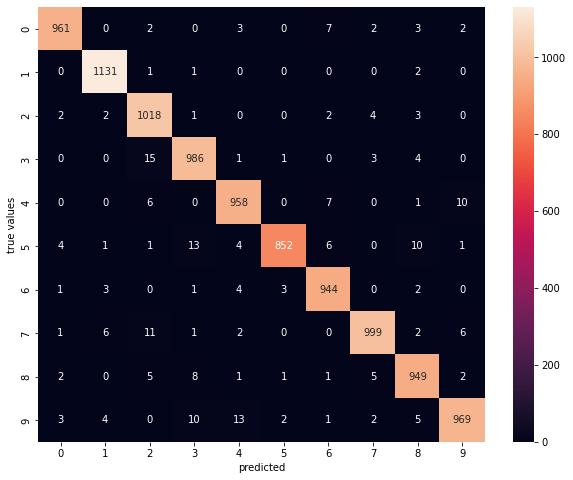

In [57]:
import seaborn as sb
plt.figure(figsize=(10,8))
sb.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('true values')

# visualization through heatmap